# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Homework  API

In [5]:
import sys
!{sys.executable} --version

Python 3.6.6 :: Anaconda, Inc.


In [6]:
#pip version
#(installing pip  : pip install citipy in commandpromt)

In [13]:
pip


The following command must be run outside of the IPython shell:

    $ pip 

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [7]:
!pwd

/c/Users/vlady/Desktop/homework/API_homework/starter_code


In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
api_key = api_keys.api_key

# URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
citydata = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        citydata.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | acapulco
Processing Record 2 of Set 1 | dudinka
Processing Record 3 of Set 1 | tacuarembo
Processing Record 4 of Set 1 | cabo san lucas
Processing Record 5 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 6 of Set 1 | tukrah
City not found. Skipping...
Processing Record 7 of Set 1 | livingstone
Processing Record 8 of Set 1 | aklavik
Processing Record 9 of Set 1 | provideniya
Processing Record 10 of Set 1 | alpena
Processing Record 11 of Set 1 | qaanaaq
Processing Record 12 of Set 1 | amderma
City not found. Skipping...
Processing Record 13 of Set 1 | norman wells
Processing Record 14 of Set 1 | guarapari
Processing Record 15 of Set 1 | saskylakh
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | atuona
Processing Record 18 of Set 1 | leningradskiy
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1

Processing Record 35 of Set 4 | port hardy
Processing Record 36 of Set 4 | itarema
Processing Record 37 of Set 4 | alice springs
Processing Record 38 of Set 4 | waterloo
Processing Record 39 of Set 4 | fortuna
Processing Record 40 of Set 4 | vavoua
Processing Record 41 of Set 4 | chuy
Processing Record 42 of Set 4 | saint anthony
Processing Record 43 of Set 4 | north augusta
Processing Record 44 of Set 4 | sao felix do xingu
Processing Record 45 of Set 4 | yagodnoye
Processing Record 46 of Set 4 | inzhavino
Processing Record 47 of Set 4 | dibrugarh
Processing Record 48 of Set 4 | saint george
Processing Record 49 of Set 4 | salinopolis
Processing Record 0 of Set 5 | sibolga
Processing Record 1 of Set 5 | sabang
Processing Record 2 of Set 5 | padang
Processing Record 3 of Set 5 | hualmay
Processing Record 4 of Set 5 | darnah
Processing Record 5 of Set 5 | great yarmouth
Processing Record 6 of Set 5 | kapaa
Processing Record 7 of Set 5 | port lincoln
Processing Record 8 of Set 5 | ambaga

Processing Record 19 of Set 8 | las vegas
Processing Record 20 of Set 8 | grindavik
Processing Record 21 of Set 8 | katsuura
Processing Record 22 of Set 8 | harigue
City not found. Skipping...
Processing Record 23 of Set 8 | mount isa
Processing Record 24 of Set 8 | sinazongwe
Processing Record 25 of Set 8 | husavik
Processing Record 26 of Set 8 | muros
Processing Record 27 of Set 8 | arawa
Processing Record 28 of Set 8 | lashio
Processing Record 29 of Set 8 | ferkessedougou
Processing Record 30 of Set 8 | grafing
Processing Record 31 of Set 8 | gujranwala
Processing Record 32 of Set 8 | tasiilaq
Processing Record 33 of Set 8 | soc trang
Processing Record 34 of Set 8 | calama
Processing Record 35 of Set 8 | comodoro rivadavia
Processing Record 36 of Set 8 | bolivar
Processing Record 37 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 38 of Set 8 | alta floresta
Processing Record 39 of Set 8 | marsa matruh
Processing Record 40 of Set 8 | kavieng
Processing Record 4

Processing Record 4 of Set 12 | vila velha
Processing Record 5 of Set 12 | severo-kurilsk
Processing Record 6 of Set 12 | mbengwi
Processing Record 7 of Set 12 | praia da vitoria
Processing Record 8 of Set 12 | puerto narino
Processing Record 9 of Set 12 | pandan
Processing Record 10 of Set 12 | yanchukan
City not found. Skipping...
Processing Record 11 of Set 12 | lengshuitan
Processing Record 12 of Set 12 | dudestii vechi
Processing Record 13 of Set 12 | marawi
Processing Record 14 of Set 12 | petropavlovskoye
Processing Record 15 of Set 12 | prnjavor
Processing Record 16 of Set 12 | dharchula
Processing Record 17 of Set 12 | lokosovo
Processing Record 18 of Set 12 | lowestoft
Processing Record 19 of Set 12 | durban
Processing Record 20 of Set 12 | olaszliszka
Processing Record 21 of Set 12 | skalat
Processing Record 22 of Set 12 | maindargi
Processing Record 23 of Set 12 | kuche
City not found. Skipping...
Processing Record 24 of Set 12 | onega
Processing Record 25 of Set 12 | yar-s

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
citydata_pd = pd.DataFrame(citydata)
citydata_pd

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,acapulco,75,MX,1543286820,83,16.86,-99.88,78.80,3.71
1,dudinka,0,RU,1543290250,33,69.41,86.18,-22.43,3.15
2,tacuarembo,92,UY,1543290250,44,-31.73,-55.98,65.82,13.00
3,cabo san lucas,20,MX,1543287120,77,22.89,-109.91,69.80,4.70
4,livingstone,68,ZW,1543290251,89,-17.85,25.86,65.96,3.38
5,aklavik,90,CA,1543287600,84,68.22,-135.01,1.40,4.27
6,provideniya,20,RU,1543287600,66,64.42,-173.23,15.80,15.66
7,alpena,90,US,1543288500,77,45.06,-83.43,29.30,12.75
8,qaanaaq,24,GL,1543290252,98,77.48,-69.36,-12.44,9.64
9,norman wells,75,CA,1543287600,85,65.28,-126.83,10.40,4.61


In [16]:
# Convert array of JSONs into Pandas DataFrame
#citydata_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
#lats = citiesdata_pd["Lat"]
#city = citiesdata_pd[]
#max_temps = citiesdata_pd["Max Temp"]
#humidity = citiesdata_pd["Humidity"]
#cloudiness = citiesdata_pd["Cloudiness"]
#wind_speed = citiesdata_pd["Wind Speed"]

# Export the City_Data into a csv
citydata_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
citydata_pd.count()

City          535
Cloudiness    535
Country       535
Date          535
Humidity      535
Lat           535
Lng           535
Max Temp      535
Wind Speed    535
dtype: int64

In [17]:
# Display the City Data Frame
citydata_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,acapulco,75,MX,1543286820,83,16.86,-99.88,78.80,3.71
1,dudinka,0,RU,1543290250,33,69.41,86.18,-22.43,3.15
2,tacuarembo,92,UY,1543290250,44,-31.73,-55.98,65.82,13.00
3,cabo san lucas,20,MX,1543287120,77,22.89,-109.91,69.80,4.70
4,livingstone,68,ZW,1543290251,89,-17.85,25.86,65.96,3.38


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

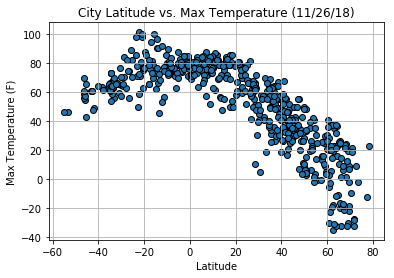

In [19]:
# Build scatter plot for latitude vs temperature
plt.scatter(citydata_pd['Lat'], citydata_pd['Max Temp'],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=1.0, label="Cities")
figsize =(10,10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

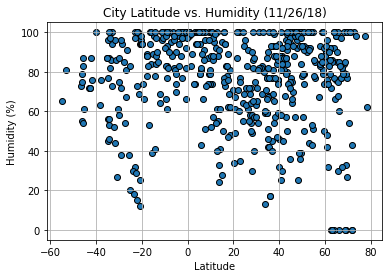

In [21]:
# Build the scatter plots for each city types
plt.scatter(citydata_pd['Lat'], citydata_pd['Humidity'],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=1.0, label="Cities")
figsize =(10,10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

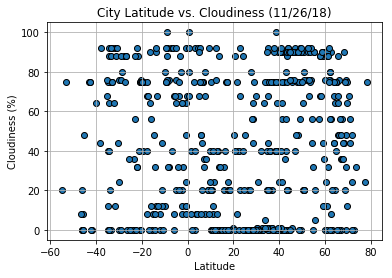

In [26]:
# Build the scatter plots for each city types
plt.scatter(citydata_pd['Lat'], citydata_pd['Cloudiness'], 
            edgecolor ="black", linewidths=1, marker="o", 
            alpha=1.0, label="Cities")
figsize=(10,10)
# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

In [27]:
!pwd

/c/Users/vlady/Desktop/homework/API_homework/starter_code


#### Latitude vs. Wind Speed Plot

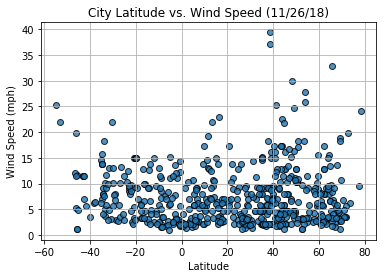

In [28]:
# Build the scatter plots for each city types
plt.scatter(citydata_pd['Lat'], citydata_pd['Wind Speed'],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()